# Thamalu Maliththa to be beaten

In [650]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#train=pd.read_csv("train.csv")
#test=pd.read_csv("test.csv")
train=pd.read_csv("C:\\Users\\ashwi\\OneDrive\\Desktop\\data science\\house_pricing\\train.csv")
test=pd.read_csv("C:\\Users\\ashwi\\OneDrive\\Desktop\\data science\\house_pricing\\test.csv")

In [651]:
# remove train cols
train.drop(["PoolQC", "MiscFeature"],axis=1,inplace=True)   

train["Fence"][train["Fence"].notna()]=1
train["Fence"]=train["Fence"].fillna(0)
train["Fence"]=pd.to_numeric(train["Fence"])


train["Alley"][train["Alley"].notna()]=1
train["Alley"]=train["Alley"].fillna(0)
train["Alley"]=pd.to_numeric(train["Alley"])


# remove test cols
test.drop(["PoolQC", "MiscFeature"],axis=1,inplace=True)   

test["Fence"][test["Fence"].notna()]=1
test["Fence"]=test["Fence"].fillna(0)
test["Fence"]=pd.to_numeric(test["Fence"])


test["Alley"][test["Alley"].notna()]=1
test["Alley"]=test["Alley"].fillna(0)
test["Alley"]=pd.to_numeric(test["Alley"])

train["FireplaceQu"]=train["FireplaceQu"].fillna("No")
test["FireplaceQu"]=test["FireplaceQu"].fillna("No")


C:\Users\ashwi\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\ashwi\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\ashwi\anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\ashwi\anaconda3\lib\site

In [652]:
train['TotalSF'] = train['TotalBsmtSF'] + train['1stFlrSF'] + train['2ndFlrSF']
test['TotalSF'] = test['TotalBsmtSF'] + test['1stFlrSF'] + test['2ndFlrSF']

In [653]:
corr = train.corr()


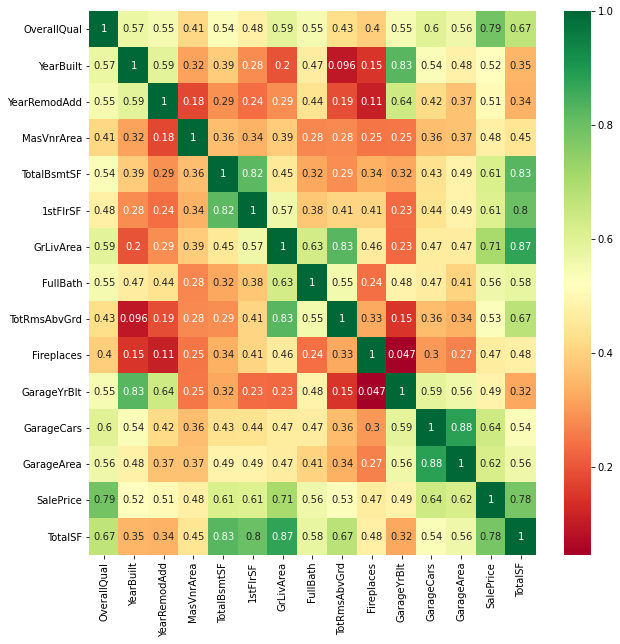

In [654]:
corr = train.corr()
highest_corr_features = corr.index[abs(corr["SalePrice"])>0.4]
plt.figure(figsize=(10,10))
g = sns.heatmap(train[highest_corr_features].corr(),annot=True,cmap="RdYlGn")

In [627]:
train[highest_corr_features].dtypes


OverallQual       int64
YearBuilt         int64
YearRemodAdd      int64
MasVnrArea      float64
TotalBsmtSF       int64
1stFlrSF          int64
GrLivArea         int64
FullBath          int64
TotRmsAbvGrd      int64
Fireplaces        int64
GarageYrBlt     float64
GarageCars        int64
GarageArea        int64
SalePrice         int64
TotalSF           int64
dtype: object

In [628]:

y= train['SalePrice']
test_id = test['Id']
train=train[highest_corr_features]

#all_data = pd.concat([train, test], axis=0, sort=False)
train = train.drop(['SalePrice'], axis=1)
test=test[train.columns]


In [605]:
from sklearn.base import TransformerMixin

class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.

        Columns of dtype object are imputed with the most frequent value 
        in column.

        Columns of other types are imputed with mean of column.

        """
    def fit(self, X, y=None):

        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].mean() for c in X],
            index=X.columns)

        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)

In [606]:
binaryEncodingColumns =['Neighborhood','Condition1','Condition2','HouseStyle','RoofMatl','Exterior1st',
                        'Exterior2nd']

In [607]:
onehotEncodingColumns = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
 'BldgType', 'RoofStyle', 'MasVnrType', 'Foundation', 'Heating', 'CentralAir', 'Electrical', 'Functional',
 'GarageType', 'PavedDrive', 'SaleCondition','SaleType']

In [608]:
labelEncodingColumns = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond']

In [629]:
t1=train[train.columns[train.isnull().any()]].isnull().sum() * 100 / train.shape[0]
cols_to_impute_train=t1.index
t2=test[test.columns[test.isnull().any()]].isnull().sum() * 100 / test.shape[0]
cols_to_impute_test=t2.index

In [630]:
train[cols_to_impute_train] = DataFrameImputer().fit_transform(train[cols_to_impute_train])
test[cols_to_impute_test] = DataFrameImputer().fit_transform(test[cols_to_impute_test])

In [631]:
#total_encoding_cols=binaryEncodingColumns.extend(onehotEncodingColumns.extend(labelEncodingColumns))
for i in binaryEncodingColumns[:]:
    if i not in highest_corr_features :
        binaryEncodingColumns.remove(i)
        
for i in onehotEncodingColumns[:]:
    if i not in highest_corr_features :
        onehotEncodingColumns.remove(i)
        
for i in  labelEncodingColumns[:]:
    if i  not in highest_corr_features:
        labelEncodingColumns.remove(i)
   


In [632]:
print("binaryEncodingColumns {}".format(len(binaryEncodingColumns)))
print("onehotEncodingColumns {}".format(len(onehotEncodingColumns)))
print("labelEncodingColumns {}".format(len(labelEncodingColumns)))



binaryEncodingColumns 0
onehotEncodingColumns 0
labelEncodingColumns 0


In [633]:
#pip install category_encoders
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce
label_encoder = LabelEncoder()
for col in labelEncodingColumns:
    train[col] = label_encoder.fit_transform(train[col])
    test[col] = label_encoder.transform(test[col])

In [634]:
from sklearn.preprocessing import OneHotEncoder
# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(train[onehotEncodingColumns]))
OH_cols_test = pd.DataFrame(OH_encoder.transform(test[onehotEncodingColumns]))

# One-hot encoding removed index; put it back
OH_cols_train.index = train[onehotEncodingColumns].index
OH_cols_test.index = test[onehotEncodingColumns].index

num_X_train = train.drop(onehotEncodingColumns, axis=1)
num_X_test = test.drop(onehotEncodingColumns, axis=1)
train = pd.concat([num_X_train, OH_cols_train], axis=1)
test = pd.concat([num_X_test, OH_cols_test], axis=1)


In [635]:
encoder= ce.BinaryEncoder(cols=binaryEncodingColumns,return_df=True)
data_encoded_train=encoder.fit_transform(train[binaryEncodingColumns])
data_encoded_test = encoder.transform(test[binaryEncodingColumns])
train = train.drop(binaryEncodingColumns, axis=1)
test = test.drop(binaryEncodingColumns, axis=1)

train = pd.concat([train, data_encoded_train], axis=1)
test = pd.concat([test, data_encoded_test], axis=1)

In [655]:
print(train.shape)
print(test.shape)


(1460, 80)
(1459, 79)


In [637]:
print("train null {}".format(train[train.columns[train.isnull().any()]].isnull().sum() * 100 / train.shape[0]))
print("train null {}".format(test[test.columns[test.isnull().any()]].isnull().sum() * 100 / test.shape[0]))

train null Series([], dtype: float64)
train null Series([], dtype: float64)


## Target study

In [638]:
# shapiro-wilks test
#The null-hypothesis of this test is that the population is normally distributed. Thus, if the p value is less than the chosen alpha level, then the null hypothesis is rejected and there is evidence that the data tested are not normally distributed. On the other hand, if the p value is greater than the chosen alpha level, then the null hypothesis (that the data came from a normally distributed population) can not be rejected (e.g., for an alpha level of .05, a data set with a p value of less than .05 rejects the null hypothesis that the data are from a normally distributed population).[
from scipy.stats import *

shapiro(y)[1]
import statsmodels.api as sm
#from matplotlib import pyplot as plt
#data_points = np.random.normal(0, 1, 100)  
# Create QQ plot

#sm.qqplot(y, line='45')
#plt.show()
#y_train.describe()
#sns.distplot(y_train)
y1 = np.log1p(y)
#sns.distplot(y_train1,fit=norm,rug=False,hist=True)


In [639]:
numeric_feats = train.dtypes[train.dtypes != 'object'].index
skewed_feats = train[numeric_feats].apply(lambda x: skew(x)).sort_values(ascending=False)
high_skew = skewed_feats[abs(skewed_feats) > 0.5]
high_skew

MasVnrArea      2.673661
TotalSF         1.774874
TotalBsmtSF     1.522688
1stFlrSF        1.375342
GrLivArea       1.365156
TotRmsAbvGrd    0.675646
Fireplaces      0.648898
YearRemodAdd   -0.503044
YearBuilt      -0.612831
GarageYrBlt    -0.667488
dtype: float64

In [640]:
train1=train.copy()
test1=test.copy()
for feature in high_skew.index:
    train1[feature] = np.log1p(train[feature])
    test1[feature] = np.log1p(test[feature])

In [641]:
from sklearn.preprocessing import StandardScaler
feature_scaler = StandardScaler()
train = feature_scaler.fit_transform(train)
test = feature_scaler.transform(test)


In [642]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import *
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from xgboost import XGBRegressor
from sklearn.model_selection import *


In [643]:

x_train, x_test, y_train, y_test = train_test_split(train, y,test_size=0.8, random_state=0)

In [644]:
print("linear reg")

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

print(model.score(x_train, y_train))

print(model.score(x_test, y_test))
y_pred=model.predict(x_test)
rmse_pred = mean_absolute_error(y_test,y_pred) 

print("Root Mean Absolute Error:" , np.sqrt(rmse_pred))

print("\n gradientboosting reg")
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(random_state=0).fit(x_train, y_train)
print(model.score(x_train, y_train))

print(model.score(x_test, y_test))
y_pred=model.predict(x_test)
rmse_pred = mean_absolute_error(y_test,y_pred) 


print("Root Mean Absolute Error:" , np.sqrt(rmse_pred))

print("\nrandomforest reg")
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=0).fit(x_train, y_train)
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))
y_pred=model.predict(x_test)
rmse_pred = mean_absolute_error(y_test,y_pred) 
 

print("Root Mean Absolute Error:" , np.sqrt(rmse_pred))

print("\nxgboost reg")
from xgboost import XGBRegressor
model = XGBRegressor(random_state=0).fit(x_train, y_train)
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))
y_pred=model.predict(x_test)
rmse_pred = mean_absolute_error(y_test,y_pred) 
print("Root Mean Absolute Error:" , np.sqrt(rmse_pred))


linear reg
0.8223348538515078
0.7482352725392108
Root Mean Absolute Error: 155.06791340305585

 gradientboosting reg
0.9763840981862782
0.8182412991269022
Root Mean Absolute Error: 145.66444059362186

randomforest reg
0.9747937642039998
0.8199406774244038
Root Mean Absolute Error: 144.752870059322

xgboost reg
0.9999964473423656
0.793728066716611
Root Mean Absolute Error: 151.14306373885898


In [645]:
model = LinearRegression()
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
grid = GridSearchCV(model,parameters, cv=5)
grid.fit(train, y)
print("r2 / variance : ", grid.best_score_)

r2 / variance :  0.7657148241927848


In [646]:
# model tuning

from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
model = XGBRegressor()

param_grid =  {
        'max_depth': [4,5,6],
#        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [1.0],
        'colsample_bytree': [1.0],
        'colsample_bylevel': [0.5],
        'learning_rate': [0.01, 0.5, 0.1],
        'n_estimators': [500, 1000, 3000, 5000] 
#        'min_child_weight': [1, 5, 10],       
        }

grid_search = GridSearchCV(model, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estima...
                                    subsample=None, tree_method=None,
                                    validate_parameters=None, verbosity=None),
             iid='deprecated', n_jobs=None,
             param_grid={'colsample_bylevel': [0.5], 'colsample_bytree': [1.0],
                   

In [647]:
best_regressor = random_search.best_estimator_
best_regressor
from sklearn.metrics import mean_absolute_error

# Get predictions
y_pred = grid_search.predict(x_test)
# Calculate MAE
rmse_pred = mean_absolute_error(y_test, y_pred) 

print("Root Mean Absolute Error:" , np.sqrt(rmse_pred))

Root Mean Absolute Error: 143.36045307487217


In [ ]:
Root Mean Absolute Error: 139.79714423171717
: 0.3287349660052532    

In [596]:
SalePrice =  np.floor(np.expm1(grid_search.predict(test1)))

SalePrice

array([123161., 145175., 181527., ..., 152258., 118286., 231849.],
      dtype=float32)

In [661]:
# drop missing values
missing = test.isnull().sum()
missing = missing[missing>0]
train.drop(missing.index, axis=1, inplace=True)
train.drop(['Electrical'], axis=1, inplace=True)

test.dropna(axis=1, inplace=True)
test.drop(['Electrical'], axis=1, inplace=True)

KeyError: "['Electrical'] not found in axis"

In [662]:
print(train.shape)
print(test.shape)
y

(1460, 49)
(1459, 49)


0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [663]:

from tqdm import tqdm
l_test = tqdm(range(0, len(test)), desc='Matching')
for i in l_test:
    for j in range(0, len(train)):
        for k in range(1, len(test.columns)):
            if test.iloc[i,k] == train.iloc[j,k]:
                continue
            else:
                break
        else:
            submission.iloc[i, 1] = train.iloc[j, -1]
            break
l_test.close()


Matching:  36%|████████████████████████▋                                            | 521/1459 [00:12<00:22, 41.45it/s]

NameError: name 'submission' is not defined


Matching:  36%|████████████████████████▋                                            | 521/1459 [00:26<00:22, 41.45it/s]

In [597]:
pd.DataFrame({'Id': test_id,'SalePrice': SalePrice}).to_csv('submission.csv',index=False)

In [523]:
x=np.sort(model.feature_importances_).argsort()
imp_cols=train.columns[np.sort(model.feature_importances_)!=0]
train[imp_cols]

AttributeError: Feature importance is not defined for Booster type None

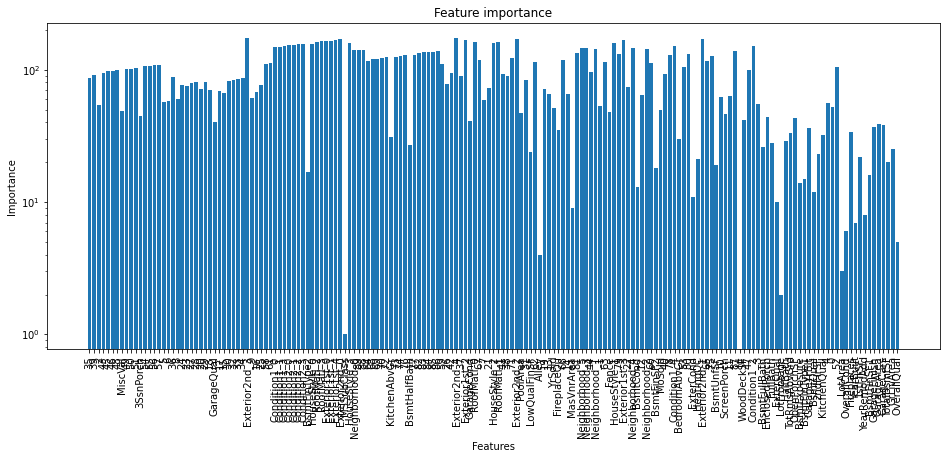

In [105]:
feature_importance = model.feature_importances_.argsort()
plt.figure(figsize=(16, 6))
plt.yscale('log', nonposy='clip')
plt.bar(range(len(feature_importance)), feature_importance)
plt.xticks(range(len(feature_importance)), train.columns, rotation='vertical')
plt.title('Feature importance')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.show()

In [228]:
#pip install auto-sklearn
#import autosklearn
#automl = autosklearn.regression.AutoSklearnRegressor()
#automl.fit(x_train, y_train)
#predictions = automl.predict(X_test)
#print("R2 score:", sklearn.metrics.r2_score(y_test, predictions))

In [ ]:
test.describe()

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error

scorer = make_scorer(mean_squared_error,greater_is_better = False)
def rmse_CV_train(model):
    kf = KFold(5,shuffle=True,random_state=42).get_n_splits(x_train.values)
    rmse = np.sqrt(-cross_val_score(model, x_train, y_train,scoring ="neg_mean_squared_error",cv=kf))
    return (rmse)
def rmse_CV_test(model):
    kf = KFold(5,shuffle=True,random_state=42).get_n_splits(train.values)
    rmse = np.sqrt(-cross_val_score(model, x_test, y_test,scoring ="neg_mean_squared_error",cv=kf))
    return (rmse)